In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true);
# pygui(true);


In [2]:
H=.2
h=1/(2*H)
max_time=50
a=(2+h-2*sqrt(h+1))/h;
Y=sqrt(2H/(2H+1));

In [3]:
ODE1(z,w)=conj(  im * w.*( 1 ./(z.^2-w.^2)+1 ./(1+w.^2) ))
ODE2(z,w)=conj(  im * z.*( 1 ./(w.^2-z.^2)+1 ./(1+z.^2) ))
Centroid_ODE(z,w)=conj( 1 ./(1+z.^2)+1 ./(1+w.^2) )

function Eq_of_M(du,u,p,t)
du[1]=real(ODE1(u[1]+im*u[2],u[3]+im*u[4]))
du[2]=imag(ODE1(u[1]+im*u[2],u[3]+im*u[4]))
du[3]=real(ODE2(u[1]+im*u[2],u[3]+im*u[4]))
du[4]=imag(ODE2(u[1]+im*u[2],u[3]+im*u[4]))
du[5]=real(Centroid_ODE(u[1]+im*u[2],u[3]+im*u[4]));
du[6]=imag(Centroid_ODE(u[1]+im*u[2],u[3]+im*u[4]))
return
    end;
Ham_numerator(Q,P)=((Q[1]+Q[2])^2+(P[1]+P[2])^2)*((Q[1]-Q[2])^2+(P[1]-P[2])^2)
Ham_denominator(Q,P)=(Q[1]^2+(P[2]-1)^2)*(Q[1]^2+(P[2]+1)^2)*(Q[2]^2+(P[1]-1)^2)*(Q[2]^2+(P[1]+1)^2)
Aref_Hamiltonian(Q,P,t)=1/2*sqrt(Ham_numerator(Q,P)/Ham_denominator(Q,P));

In [4]:
u0=[0;1e-3 *sqrt(2);0;Y;0;0;0]
Q0=[u0[1],u0[3]]; P0=[u0[2],u0[4]]
tspan = (0.0,max_time)

(0.0, 50)

In [5]:
Aref_Hamiltonian(Q0,P0,max_time)

0.19999899999800003

In [6]:
prob = ODEProblem(Eq_of_M,u0,tspan)
t,A=solve(prob, Vern9(),reltol=1e-13,abstol=1e-20,maxiters=1e15);

retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 1687-element Array{Float64,1}:
  0.0                  
  3.980781730886659e-8 
  8.501437378796005e-8 
  1.3816287902332096e-7
  1.9851978339925397e-7
  2.72242622589445e-7  
  3.554577450024135e-7 
  4.4988346445579253e-7
  5.601072656851455e-7 
  6.930532763769185e-7 
  8.559437734679364e-7 
  1.0544703200718997e-6
  1.2818557628518e-6   
  ⋮                    
 49.69128634587112     
 49.71904638046764     
 49.747148869218826    
 49.77721764773939     
 49.80860642268603     
 49.839208633284265    
 49.86864727072912     
 49.89715039008404     
 49.92559839406455     
 49.9542858200018      
 49.98388281103851     
 50.0                  
u: 1687-element Array{Array{Float64,1},1}:
 [0.0, 0.00141421, 0.0, 0.534522, 0.0, 0.0, 0.0]                                
 [-1.04264e-7, 0.00141421, 1.40743e-10, 0.534522, 9.55388e-8, -2.14631e-31, 0.0]
 [-2.22667e-7, 0.00141421, 3.00574e-10, 0.534522, 2.04035e-7, -4

In [7]:
N=length(t.t)
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
Energy=zeros(N)
for k=1:N
    Energy[k]=abs(1/(1+Z[k]^2)-1/(1+W[k]^2))
end

In [8]:
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:];

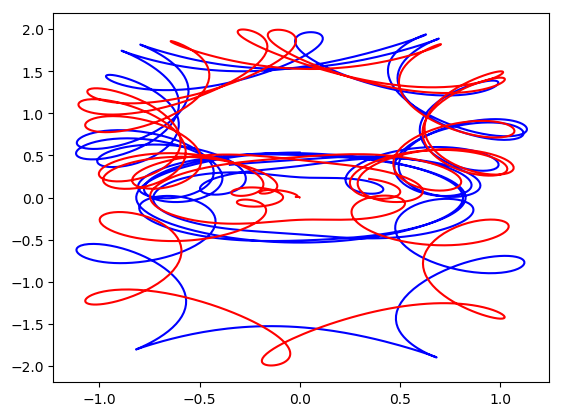

In [9]:
plot(Q1,P1,"b")
plot(Q2,P2,"r");

In [10]:
q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2);

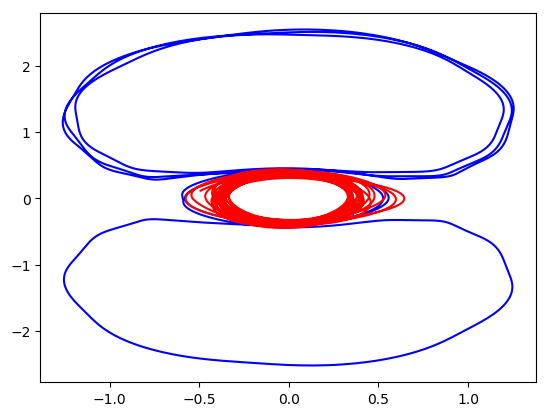

In [11]:
plot(q1,p1,"b")
plot(q2,p2,"r");

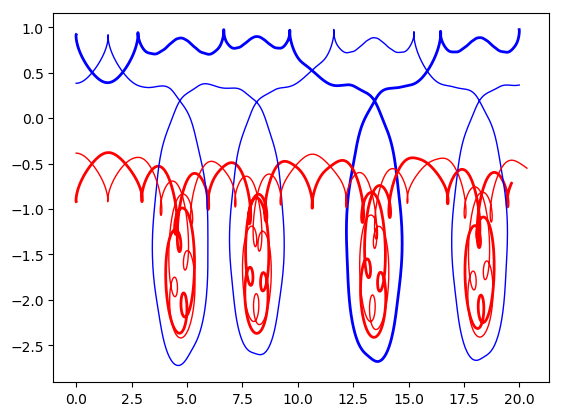

In [25]:
Centeroid=A[5,:]+im *A[6,:];

lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg)

plot(z_1posX,z_1posY,"b",linewidth=2)
plot(z_1negX,z_1negY,"r",linewidth=2)
plot(z_2posX,z_2posY,"b",linewidth=1)
plot(z_2negX,z_2negY,"r",linewidth=1)
aspect_ratio=:equal;

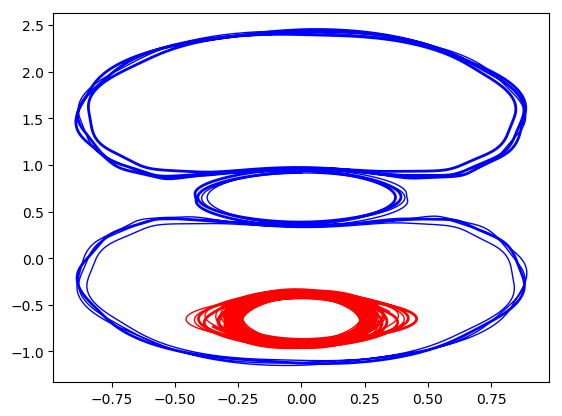

In [26]:
Centeroid=zeros(N);

lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg)

plot(z_1posX,z_1posY,"b",linewidth=2)
plot(z_1negX,z_1negY,"r",linewidth=2)
plot(z_2posX,z_2posY,"b",linewidth=1)
plot(z_2negX,z_2negY,"r",linewidth=1)
aspect_ratio=:equal;